In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [4]:
img = image.load_img(r'C:\Users\Naveena harikrishnan\Downloads\Data_Set_1_Subset\train\real\real_64594.jpg')

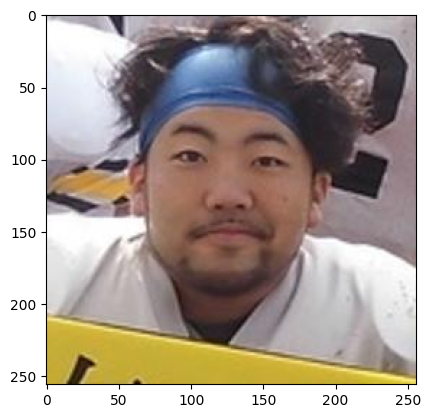

In [5]:
plt.imshow(img)

In [6]:
cv2.imread(r'C:\Users\Naveena harikrishnan\Downloads\Data Set 1\Data Set 1\train\real\real_9997.jpg').shape

(256, 256, 3)

In [7]:
train = ImageDataGenerator(rescale = 1./255)
valid = ImageDataGenerator(rescale = 1./255)

In [16]:
train_dataset = train.flow_from_directory(r'C:\Users\Naveena harikrishnan\Downloads\Data_Set_1_Subset\train',
                                          target_size = (64,64),
                                          batch_size = 16,
                                          class_mode = 'binary')

validation_dataset = valid.flow_from_directory(r'C:\Users\Naveena harikrishnan\Downloads\Data_Set_1_Subset\validation',
                                               target_size = (64,64),
                                               batch_size = 16,
                                               class_mode = 'binary')

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
train_dataset.class_indices

{'fake': 0, 'real': 1}

In [18]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape= (64,64,3)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Flatten(),
    #
    tf.keras.layers.Dense(256,activation = 'relu'),
    #
    tf.keras.layers.Dense(1,activation = 'sigmoid'),
    #tf.keras.layers.Dropout(0.5)
])


    
    
    
    

In [52]:
model.compile(loss = 'binary_crossentropy',optimizer = Adam(0.0008),
              metrics = ['accuracy'])

In [54]:
test = ImageDataGenerator(rescale = 1./255)
test_dataset = test.flow_from_directory(r'C:\Users\Naveena harikrishnan\Downloads\Data_Set_1_Subset\test',
                                          target_size = (64,64),
                                          batch_size = 16,
                                          class_mode = 'binary')





Found 1000 images belonging to 2 classes.


In [64]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 10,
                      epochs = 20,
                      validation_data = validation_dataset)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 769ms/step - accuracy: 1.0000 - loss: 0.0232 - val_accuracy: 0.8910 - val_loss: 0.3388
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 694ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.9480 - val_loss: 0.1263
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 541ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 0.9610 - val_loss: 0.1051
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 586ms/step - accuracy: 0.9921 - loss: 0.0290 - val_accuracy: 0.9610 - val_loss: 0.1020
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 570ms/step - accuracy: 0.9932 - loss: 0.0208 - val_accuracy: 0.9790 - val_loss: 0.0605
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 568ms/step - accuracy: 0.9775 - loss: 0.0549 - val_accuracy: 0.9370 - val_loss: 0.1990
Epoch 7/20
 3/10 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 1.0000 - loss: 0.0108

C:\Users\Naveena harikrishnan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 435ms/step - accuracy: 1.0000 - loss: 0.0108 - val_accuracy: 0.9160 - val_loss: 0.2730
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 581ms/step - accuracy: 0.9778 - loss: 0.0507 - val_accuracy: 0.9540 - val_loss: 0.1610
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 467ms/step - accuracy: 0.9738 - loss: 0.0765 - val_accuracy: 0.9610 - val_loss: 0.1020
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 657ms/step - accuracy: 0.9738 - loss: 0.0603 - val_accuracy: 0.9550 - val_loss: 0.1195
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 525ms/step - accuracy: 0.9885 - loss: 0.0292 - val_accuracy: 0.9680 - val_loss: 0.0786
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 724ms/step - accuracy: 0.9904 - loss: 0.0303 - val_accuracy: 0.9660 - val_loss: 0.1175
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 513ms/step - accuracy: 0.9966 - loss: 0.0100 - val_accuracy: 0.9870 - val_loss: 0.0434
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 409ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9850 -

In [32]:
# Load and preprocess your image
img = image.load_img(r'C:\Users\Naveena harikrishnan\Downloads\Data_Set_1_Subset\train\real\real_64594.jpg',
                     target_size=(64, 64))  # same as model input
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # normalize like training
img_array = np.expand_dims(img_array, axis=0)  # reshape to (1, 64, 64, 3)

# Predict
prediction = model.predict(img_array)

# Since it's binary classification (sigmoid), use threshold
if prediction[0][0] >= 0.5:
    print("Prediction: Real")
else:
    print("Prediction: Fake")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step
Prediction: FAKE


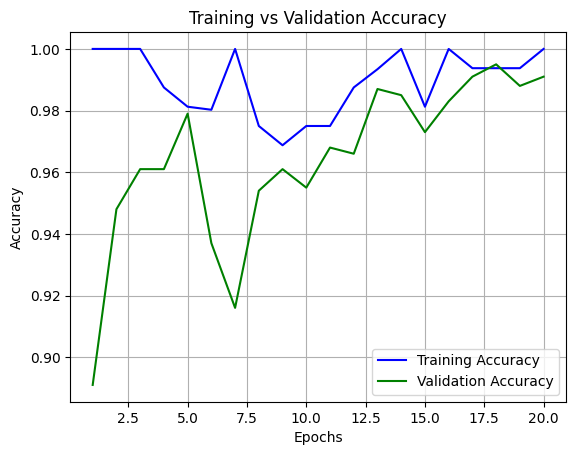

In [65]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from history
train_acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

# Create a list of epoch numbers
epochs = range(1, len(train_acc) + 1)

# Plot both training and validation accuracy
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
print("Class indices:", train_dataset.class_indices)


Class indices: {'fake': 0, 'real': 1}


In [66]:
print(f"\nFinal Training Accuracy: {train_acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")



Final Training Accuracy: 1.0000
Final Validation Accuracy: 0.9910


In [34]:
val_loss, val_accuracy = model.evaluate(validation_dataset)
print(f"Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9940 - loss: 0.0244
Validation Loss: 0.0280, Accuracy: 0.9910


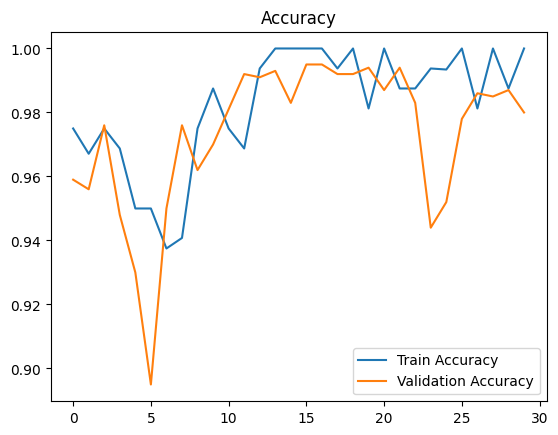

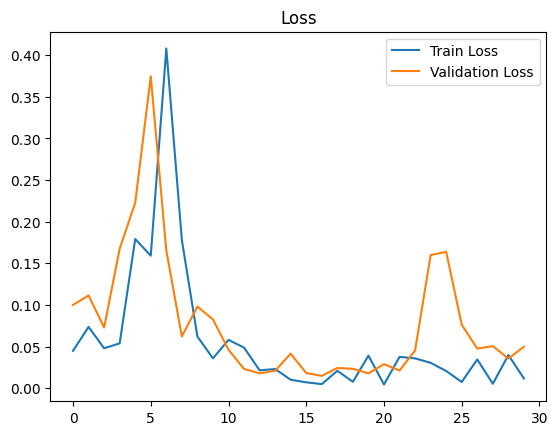

In [56]:
# Plot accuracy
plt.plot(model_fit.history['accuracy'], label='Train Accuracy')
plt.plot(model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(model_fit.history['loss'], label='Train Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [38]:
#testing the model
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predictions and true labels
y_true = []
y_pred = []

for i in range(len(validation_dataset)):
    x, y = validation_dataset[i]
    preds = model.predict(x)
    y_true.extend(y)
    y_pred.extend((preds > 0.5).astype(int).flatten())  # 0 = FAKE, 1 = REAL

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18

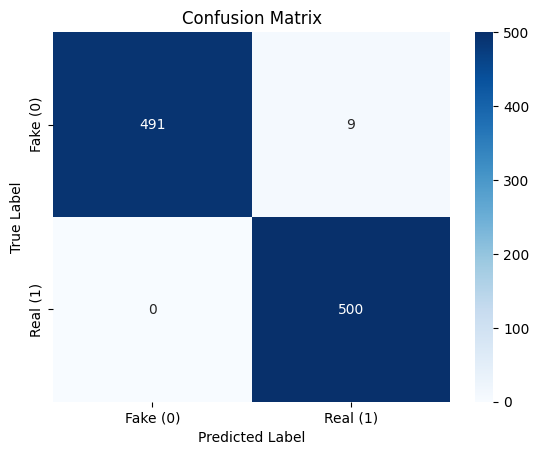

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake (0)', 'Real (1)'], yticklabels=['Fake (0)', 'Real (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [58]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Fake (0)", "Real (1)"]))



Confusion Matrix:
[[491   9]
 [  0 500]]

Classification Report:
              precision    recall  f1-score   support

    Fake (0)       1.00      0.98      0.99       500
    Real (1)       0.98      1.00      0.99       500

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [59]:
from tensorflow.keras.preprocessing import image
import numpy as np

new_image_path = r'C:\Users\Naveena harikrishnan\Downloads\Data Set 1\Data Set 1\test\real\real_4591.jpg'
img = image.load_img(new_image_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = "FAKE (0)" if prediction[0][0] < 0.5 else "REAL (1)"

print(f"Prediction: {predicted_class} | Confidence: {prediction[0][0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
Prediction: REAL (1) | Confidence: 1.0000


In [46]:
print(train_dataset.class_indices)


{'fake': 0, 'real': 1}
